In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Importar árboles de ensacado y clasificadores de bosques aleatorios
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
filename = "/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_7/Data/OnlineRetail.csv"
df = pd.read_csv(filename,encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Separar columna "InvoiceDate" en 2 distintas con fechas y hora

In [3]:
Lista_Fecha_ini=[]
Lista_Hora_ini=[]
for i in range(0, len(df)):
    Lista_Fecha_ini.append(df["InvoiceDate"][i].split()[0])
    Lista_Hora_ini.append(df["InvoiceDate"][i].split()[1])

In [4]:
df["Fecha_Inicio"]=Lista_Fecha_ini
df["Hora_Inicio"]=Lista_Hora_ini
df=df.drop(columns=["InvoiceDate"])
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Fecha_Inicio,Hora_Inicio
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,01-12-2010,08:26
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,01-12-2010,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,01-12-2010,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,01-12-2010,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,01-12-2010,08:26


# Información y descripción de la data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   UnitPrice     541909 non-null  float64
 5   CustomerID    406829 non-null  float64
 6   Country       541909 non-null  object 
 7   Fecha_Inicio  541909 non-null  object 
 8   Hora_Inicio   541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Limpiando datos

In [6]:
df.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
UnitPrice            0
CustomerID      135080
Country              0
Fecha_Inicio         0
Hora_Inicio          0
dtype: int64

In [7]:
df.duplicated().sum()

5268

In [8]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Fecha_Inicio,Hora_Inicio
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,1.25,17908.0,United Kingdom,01-12-2010,11:45
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2.10,17908.0,United Kingdom,01-12-2010,11:45
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2.95,17908.0,United Kingdom,01-12-2010,11:45
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,4.95,17908.0,United Kingdom,01-12-2010,11:45
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2.95,17920.0,United Kingdom,01-12-2010,11:49
...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,0.39,14446.0,United Kingdom,09-12-2011,11:34
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2.49,14446.0,United Kingdom,09-12-2011,11:34
541692,581538,22992,REVOLVER WOODEN RULER,1,1.95,14446.0,United Kingdom,09-12-2011,11:34
541699,581538,22694,WICKER STAR,1,2.10,14446.0,United Kingdom,09-12-2011,11:34


In [9]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Fecha_Inicio,Hora_Inicio
622,536414,22139,NaN,56,0.00,NaN,United Kingdom,01-12-2010,11:52
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom,01-12-2010,14:32
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom,01-12-2010,14:32
1445,536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom,01-12-2010,14:32
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom,01-12-2010,14:32
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,NaN,United Kingdom,09-12-2011,10:26
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,NaN,United Kingdom,09-12-2011,10:26
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,NaN,United Kingdom,09-12-2011,10:26
541539,581498,85174,S/4 CACTI CANDLES,1,10.79,NaN,United Kingdom,09-12-2011,10:26


In [10]:
def Upgrade_Item_Identifier_mean(InvoiceNo):
    Customer_ID_filter  = df['InvoiceNo'] == InvoiceNo
    values_mean = df[Customer_ID_filter]['CustomerID'].mean()
    return values_mean

In [11]:
Customer_ID_filter_isna = df['CustomerID'].isna()

In [12]:
df.loc[Customer_ID_filter_isna , 'CustomerID'] = df.apply(lambda x:Upgrade_Item_Identifier_mean( x['InvoiceNo']) ,axis=1 )
df[Customer_ID_filter_isna]

KeyboardInterrupt: 

In [ ]:
dicc={}

for i in df.index:
    if pd.isnull(df['Description'][i]):
        x = df['StockCode'][i]
        dicc[x]=''
print(dicc)


In [ ]:
for sc in dicc:
    for e in range(0, len(df['StockCode'])):
        if sc == df['StockCode'][e] and pd.notnull(df['Description'][e]):
            dicc[sc]=df['Description'][e]
print(dicc)


In [ ]:
for u in df.index:
    if pd.isnull(df['Description'][u]):
        for sc in dicc:
            if sc == df['StockCode'][u] and dicc[sc]!="":
                df['Description'][u] = dicc[sc]


In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     406829 non-null  object 
 1   StockCode     406829 non-null  object 
 2   Description   406829 non-null  object 
 3   Quantity      406829 non-null  int64  
 4   UnitPrice     406829 non-null  float64
 5   CustomerID    406829 non-null  float64
 6   Country       406829 non-null  object 
 7   Fecha_Inicio  406829 non-null  object 
 8   Hora_Inicio   406829 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 31.0+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder
columna=list(df.describe(include=object).columns)
for i in range(len(columna)):
    print (columna[i],df[columna[i]].unique() )

InvoiceNo ['536365' '536366' '536367' ... '581585' '581586' '581587']
StockCode ['85123A' '71053' '84406B' ... '90214Z' '90089' '23843']
Description ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Country ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
Fecha_Inicio ['01-12-2010' '02-12-2010' '03-12-2010' '05-12-2010' '06-12-2010'
 '07-12-2010' '08-12-2010' '09-12-2010' '10-12-2010' '12-12-2010'
 '13-12-2010' '14-12-2010' '15-12-2010' '16-12-2010' '17-12-2010'
 '19-12-2010'

In [16]:
for i in range (len(columna)):
    etiq = LabelEncoder()
    Label = etiq.fit_transform(df[columna[i]])
    label_embarked = {index: label for index, label in 
                    enumerate(etiq.classes_)}
    label_embarked
    df[columna[i]]=Label

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     406829 non-null  int64  
 1   StockCode     406829 non-null  int64  
 2   Description   406829 non-null  int64  
 3   Quantity      406829 non-null  int64  
 4   UnitPrice     406829 non-null  float64
 5   CustomerID    406829 non-null  float64
 6   Country       406829 non-null  int64  
 7   Fecha_Inicio  406829 non-null  int64  
 8   Hora_Inicio   406829 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.0 MB


In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Fecha_Inicio,Hora_Inicio
0,0,3249,3716,6,2.55,17850.0,35,9,63
1,0,2649,3724,6,3.39,17850.0,35,9,63
2,0,2855,861,8,2.75,17850.0,35,9,63
3,0,2803,1813,6,3.39,17850.0,35,9,63
4,0,2802,2776,6,3.39,17850.0,35,9,63
...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,0.85,12680.0,13,96,327
541905,18535,1746,695,6,2.10,12680.0,13,96,327
541906,18535,2086,701,4,4.15,12680.0,13,96,327
541907,18535,2087,700,4,4.15,12680.0,13,96,327


In [21]:
df['Valor_compra']=df['Quantity']*df['UnitPrice']

In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Fecha_Inicio,Hora_Inicio,Valor_compra
0,0,3249,3716,6,2.55,17850.0,35,9,63,15.30
1,0,2649,3724,6,3.39,17850.0,35,9,63,20.34
2,0,2855,861,8,2.75,17850.0,35,9,63,22.00
3,0,2803,1813,6,3.39,17850.0,35,9,63,20.34
4,0,2802,2776,6,3.39,17850.0,35,9,63,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,0.85,12680.0,13,96,327,10.20
541905,18535,1746,695,6,2.10,12680.0,13,96,327,12.60
541906,18535,2086,701,4,4.15,12680.0,13,96,327,16.60
541907,18535,2087,700,4,4.15,12680.0,13,96,327,16.60


# KMeans 
* Analizar cantidad y precio y luego enfocarnos en los paises

In [19]:
df["Country"].value_counts()

35    361878
14      9495
13      8491
10      7485
30      2533
23      2371
3       2069
32      1877
26      1480
0       1259
24      1086
18       803
6        758
12       695
7        622
31       462
1        401
9        389
19       358
25       341
33       291
17       250
36       244
29       229
16       182
5        151
15       146
22       127
34        68
11        61
27        58
20        45
21        35
4         32
8         30
2         17
28        10
Name: Country, dtype: int64

In [20]:
df['Country'].nunique()

37

In [42]:
X=df[["CustomerID",'Valor_compra']].values

In [43]:
X

array([[1.785e+04, 1.530e+01],
       [1.785e+04, 2.034e+01],
       [1.785e+04, 2.200e+01],
       ...,
       [1.268e+04, 1.660e+01],
       [1.268e+04, 1.660e+01],
       [1.268e+04, 1.485e+01]])

In [30]:
from sklearn.cluster import KMeans

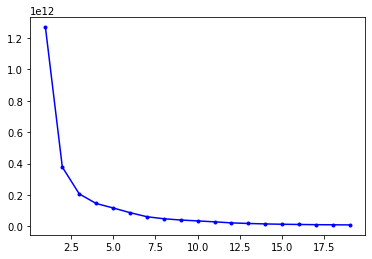

In [44]:
score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    

plt.plot(k_clusters, score,'b.-')

In [45]:
k = 7
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

y_pred = kmeans.predict(X)

Text(0.5, 0, 'CustomerID')

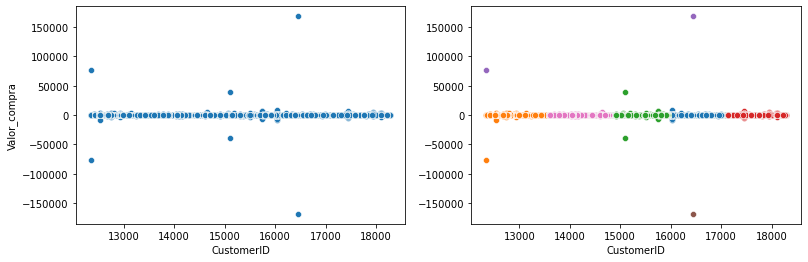

In [47]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=df,x='CustomerID',y='Valor_compra')
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=X[y_pred==i,0],y=X[y_pred==i,1])
ax2.set_xlabel('CustomerID')

In [48]:
datas=pd.DataFrame(y_pred)
graf=datas.groupby(0)[0].count()
graf

0
0    75083
1    83859
2    78919
3    79654
4        2
5        1
6    89311
Name: 0, dtype: int64

Text(0, 0.5, 'Cantidad')

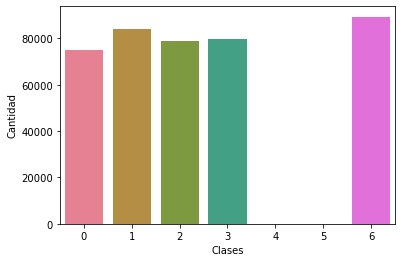

In [49]:
sns.barplot(x=graf.index,y=graf.values,palette='husl')
plt.xlabel('Clases')
plt.ylabel('Cantidad')

In [50]:
df['Clase']=y_pred
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Fecha_Inicio,Hora_Inicio,Valor_compra,Clase
0,0,3249,3716,6,2.55,17850.0,35,9,63,15.30,3
1,0,2649,3724,6,3.39,17850.0,35,9,63,20.34,3
2,0,2855,861,8,2.75,17850.0,35,9,63,22.00,3
3,0,2803,1813,6,3.39,17850.0,35,9,63,20.34,3
4,0,2802,2776,6,3.39,17850.0,35,9,63,20.34,3
...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,0.85,12680.0,13,96,327,10.20,1
541905,18535,1746,695,6,2.10,12680.0,13,96,327,12.60,1
541906,18535,2086,701,4,4.15,12680.0,13,96,327,16.60,1
541907,18535,2087,700,4,4.15,12680.0,13,96,327,16.60,1


In [55]:
df.loc[df['Clase']==4,:]
df.loc[df['Clase']==5,:]
df2=df.loc[~((df['Clase']==4)|(df['Clase']==5)),:]

<AxesSubplot:xlabel='Clase', ylabel='Valor_compra'>

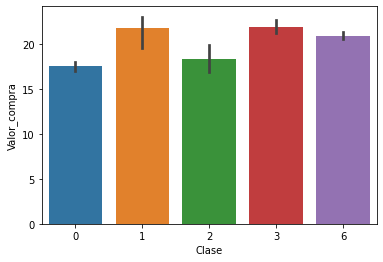

In [56]:
sns.barplot(data=df2,x='Clase',y='Valor_compra')

In [ ]:
X["clase"]=y_pred

In [ ]:
conteo=[]
aux=0
for j in range (0,7):
    for i in range (0,len(y_pred)):
        if (y_pred[i]==j):
            aux=aux+1
    conteo.append(aux)
    aux=0
print(conteo)

In [ ]:
km=[]

In [ ]:
#No supervisado, no hay target
sns.barplot(x = km, y = conteo);
plt.xticks(rotation = 90);